### Investigate how Root-Mean-Squared-Log-error is different from RMSE

In [2]:
import numpy as np

### Make the data

In [18]:
np.random.seed(42)

start, stop = 0, 5
X = np.linspace(start, stop, num=20, endpoint=True, retstep=False, dtype=None).round(2)

a0 = 5
a1 = 0.5
a2 = 0
y = (a0 + a1*X + a2*X**2).round(2)

### Plot it

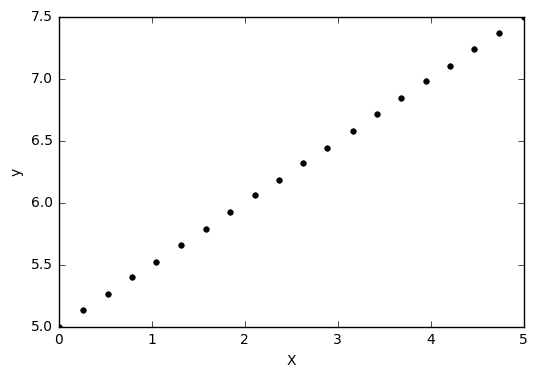

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X, y, 'ko', markersize = 4)
ax.set_xlabel('X')
ax.set_ylabel('y');

### Make the loss functions

In [5]:
def root_mean_sq_error(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

def root_mean_sq_log_error(y_true, y_pred):
    return np.sqrt(np.mean((np.log(y_true + 1) - np.log(y_pred+1))**2))

### Fit the model

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lr_eql_weights = LinearRegression()
lr_uneql_weights = LinearRegression()
weights_eql = np.ones(len(y))
#weights_increasing = np.linspace(1,2, num= len(y)).round(2)
#weights_increasing = (weights_increasing**3).round(2)
weights_increasing = y
weights_increasing

array([  5.  ,   5.16,   5.41,   5.71,   6.08,   6.53,   7.04,   7.61,
         8.28,   8.99,   9.77,  10.62,  11.57,  12.56,  13.61,  14.78,
        15.97,  17.23,  18.6 ,  20.  ])

In [8]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

In [9]:
lr_eql_weights.fit(X, y, sample_weight = weights_eql)
b, m = lr_eql_weights.intercept_[0], lr_eql_weights.coef_[0][0]
print b, m

3.026 3.0


In [10]:
lr_uneql_weights.fit(X, y, sample_weight = weights_increasing)
b_ue, m_ue = lr_uneql_weights.intercept_[0], lr_uneql_weights.coef_[0][0]
print b_ue, m_ue

2.31079897174 3.25837170135


In [11]:
y_eq = lr_eql_weights.predict(X).round(2)
y_uneq = lr_uneql_weights.predict(X).round(2)

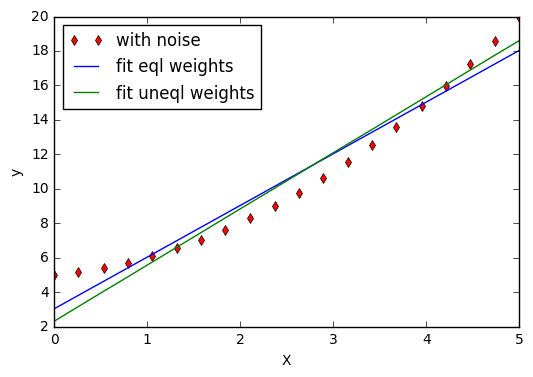

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X, y, 'rd', markersize = 5, label = 'with noise')
ax.plot(X, y_eq, 'b-', markersize = 3, label = 'fit eql weights')
ax.plot(X, y_uneq, 'g-', markersize = 3, label = 'fit uneql weights')
#ax.set_aspect('equal')
ax.set_xlabel('X')
ax.set_ylabel('y');
ax.legend(loc = 'best');

In [15]:
rmse_eq = root_mean_sq_error(y, y_eq)
rmsle_eq = root_mean_sq_log_error(y, y_eq)
print rmse_eq, rmsle_eq

1.02716113634 0.128329155804


In [17]:
rmse_uneq = root_mean_sq_error(y, y_uneq)
rmsle_uneq = root_mean_sq_log_error(y, y_uneq)
print rmse_uneq, rmsle_uneq

1.10164876435 0.180448046941
